In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import joblib

In [2]:
df = pd.read_csv('preprocessed_data.csv')
df = df[['text2', 'type']]
print(df.head())

                                               text2  type
0                         apology fellow black woman     0
1  authority urge louisiana resident evacuate dan...     1
2  bernie sander : sheriff joe arpaio 'ambushed '...     0
3              pilot tell passenger 's try something     1
4  danny pintauro clarifies tony danza 's 'disapp...     0


In [3]:
from collections import Counter
print(Counter(df['type'].values))

Counter({0: 14985, 1: 11724})


In [4]:
df.dropna(inplace = True)

In [5]:
df = df[df['type'].isin([0,1])]

In [6]:
print(Counter(df['type'].values))

Counter({0: 14985, 1: 11724})


In [7]:
df = df.sample(frac=1, random_state = 24).reset_index(drop=True)
df.head()

,text2,type
0,new study find american need 6 hour sleep work,1
1,7 super seed big health benefit,0
2,5 single parent dating tip,0
3,nervous steve bannon binge-eats entire class i...,1
4,hippie tell real crime,1


In [9]:
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download('punkt')

df["text2"] = df["text"].apply(word_tokenize)
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\psnay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,text,type,text2
0,an apology to my fellow black woman,0,"[an, apology, to, my, fellow, black, woman]"
1,authorities urge louisiana residents to evacua...,1,"[authorities, urge, louisiana, residents, to, ..."
2,bernie sanders: sheriff joe arpaio 'ambushed' ...,0,"[bernie, sanders, :, sheriff, joe, arpaio, 'am..."
3,pilot tells passengers he's about to try somet...,1,"[pilot, tells, passengers, he, 's, about, to, ..."
4,danny pintauro clarifies tony danza's 'disappo...,0,"[danny, pintauro, clarifies, tony, danza, 's, ..."


In [10]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

df['text2']= df['text2'].apply(lambda x:remove_stopwords(x))
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\psnay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,type,text2
0,an apology to my fellow black woman,0,"[apology, fellow, black, woman]"
1,authorities urge louisiana residents to evacua...,1,"[authorities, urge, louisiana, residents, evac..."
2,bernie sanders: sheriff joe arpaio 'ambushed' ...,0,"[bernie, sanders, :, sheriff, joe, arpaio, 'am..."
3,pilot tells passengers he's about to try somet...,1,"[pilot, tells, passengers, 's, try, something]"
4,danny pintauro clarifies tony danza's 'disappo...,0,"[danny, pintauro, clarifies, tony, danza, 's, ..."


In [11]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
#defining the function for lemmatization
def lemmatizer(text):
  lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
  return lemm_text
df['text2']=df['text2'].apply(lambda x: lemmatizer(x))
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\psnay\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\psnay\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,text,type,text2
0,an apology to my fellow black woman,0,"[apology, fellow, black, woman]"
1,authorities urge louisiana residents to evacua...,1,"[authority, urge, louisiana, resident, evacuat..."
2,bernie sanders: sheriff joe arpaio 'ambushed' ...,0,"[bernie, sander, :, sheriff, joe, arpaio, 'amb..."
3,pilot tells passengers he's about to try somet...,1,"[pilot, tell, passenger, 's, try, something]"
4,danny pintauro clarifies tony danza's 'disappo...,0,"[danny, pintauro, clarifies, tony, danza, 's, ..."


In [12]:
df['text2'] = df['text2'].apply(lambda x: " ".join(x))
df.head()

,text,type,text2
0,an apology to my fellow black woman,0,apology fellow black woman
1,authorities urge louisiana residents to evacua...,1,authority urge louisiana resident evacuate dan...
2,bernie sanders: sheriff joe arpaio 'ambushed' ...,0,bernie sander : sheriff joe arpaio 'ambushed '...
3,pilot tells passengers he's about to try somet...,1,pilot tell passenger 's try something
4,danny pintauro clarifies tony danza's 'disappo...,0,danny pintauro clarifies tony danza 's 'disapp...


In [24]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text2'], df['type'], test_size=0.2, random_state=42)
X_test[:4000] = X_train[:4000]
y_test[:4000] = y_train[:4000]

# Vectorize the text using TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

# save the fitted vectorizer
joblib.dump(vectorizer, 'vectorizer.joblib')

X_test = vectorizer.transform(X_test)


In [25]:
# Train the SVM classifier
clf_svm = svm.SVC(kernel='linear')
clf_svm.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = clf_svm.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.8871209284912018
Confusion Matrix:
[[2731  224]
 [ 379 2008]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      2955
           1       0.90      0.84      0.87      2387

    accuracy                           0.89      5342
   macro avg       0.89      0.88      0.89      5342
weighted avg       0.89      0.89      0.89      5342



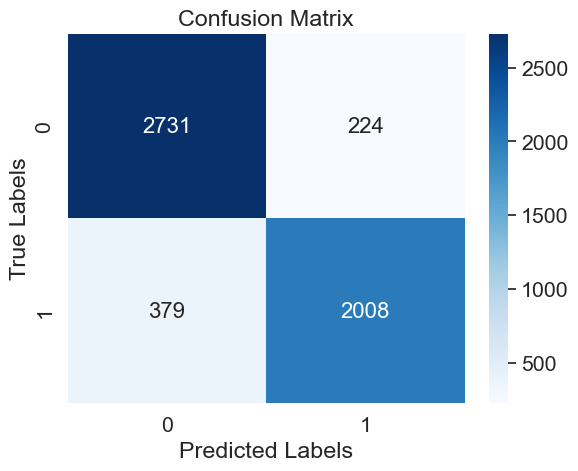

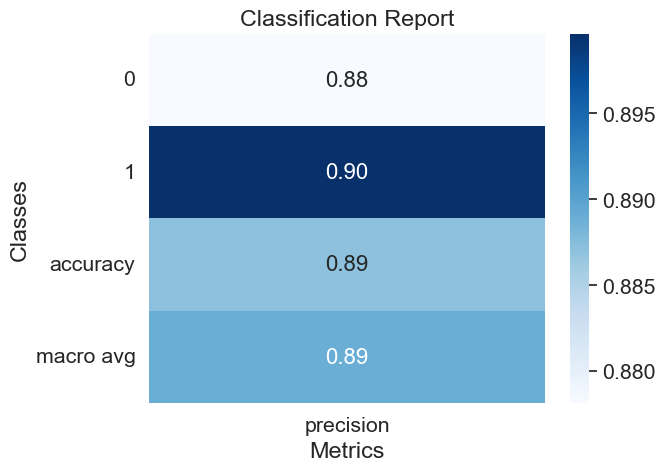

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 16})
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Generate the classification report
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Plot the classification report
sns.set(font_scale=1.4)
sns.heatmap(df_report.iloc[:-1, :-3], annot=True, cmap="Blues", fmt=".2f", annot_kws={"size": 16})
plt.title("Classification Report")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.show()


In [27]:
import joblib

# Save the trained model to a file
joblib.dump(clf_svm, 'svm_model.joblib')

['svm_model.joblib']

In [29]:
from sklearn.naive_bayes import MultinomialNB

# Train the Naive Bayes classifier
clf_mnb = MultinomialNB()
clf_mnb.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = clf_mnb.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.8596031448895545
Confusion Matrix:
[[2808  147]
 [ 603 1784]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      2955
           1       0.92      0.75      0.83      2387

    accuracy                           0.86      5342
   macro avg       0.87      0.85      0.85      5342
weighted avg       0.87      0.86      0.86      5342



In [30]:
from sklearn.ensemble import RandomForestClassifier
# Train the Random Forest classifier
clf_rfc = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rfc.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = clf_rfc.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.9361662298764508
Confusion Matrix:
[[2862   93]
 [ 248 2139]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2955
           1       0.96      0.90      0.93      2387

    accuracy                           0.94      5342
   macro avg       0.94      0.93      0.93      5342
weighted avg       0.94      0.94      0.94      5342



In [41]:
# Save the trained model to a file
joblib.dump(clf_rfc, 'rfc _model.joblib')

['rfc _model.joblib']

In [31]:
import xgboost as xgb
# Train the XGBoost classifier
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'max_depth': 6, 'eta': 0.3, 'objective': 'multi:softmax', 'num_class': 2}
num_rounds = 10
bst = xgb.train(params, dtrain, num_rounds)

# Predict the labels for the test set
y_pred = bst.predict(dtest)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.6770872332459753
Confusion Matrix:
[[2823  132]
 [1593  794]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.96      0.77      2955
           1       0.86      0.33      0.48      2387

    accuracy                           0.68      5342
   macro avg       0.75      0.64      0.62      5342
weighted avg       0.74      0.68      0.64      5342



In [38]:
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

def preprocess(text):
    # Tokenize the text
    
    tokens = word_tokenize(text)

    # Remove stopwords
    stopwords_list = nltk.corpus.stopwords.words('english')
    tokens = [token for token in tokens if token.lower() not in stopwords_list]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join the lemmatized tokens back into a string
    preprocessed_text = ' '.join(lemmatized_tokens)

    return preprocessed_text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\psnay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\psnay\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\psnay\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [39]:
def predict(text):
    # Preprocess the text
    preprocessed_text = preprocess(text)

    # Vectorize the preprocessed text using the pre-fitted TF-IDF vectorizer
    vectorized_text = vectorizer.transform([preprocessed_text])

    # Predict the class label using the pre-trained SVM classifier
    label = clf_rfc.predict(vectorized_text)[0]

    return label

In [40]:
if predict("ex-boyfriend just thought he'd check in and throw entire day off") == 0:
    print("fake news")
else:
    print("satire")

satire


In [4]:
import streamlit as st

# Function to classify the input text
def classify_text(text):
    if predict(text) == 0:
        return "fake news"
    else:
        return "satire"

# Streamlit app
st.title("Text Classifier")
text_input = st.text_input("Enter text to classify:")
if st.button("Classify"):
    result = classify_text(text_input)
    st.write(f"Result: {result}")

KeyboardInterrupt: 